# Milestone 2 - Group 1041 (Matthew Currie, Jivraj , Livia)

## Medical Cost Database Research Questions

Our Data Set comes from Brett Lantz's book, _Machine Learning with R_. It was created to be used for testing machine learning models and their ability to predict medical costs.

<!-- These are coming from the README.md file we have in the main directory -->
1. Does medical cost increase with age?
2. Does having children increase one's medical costs?
3. Do men with High BMI's face higher medical costs than women with High BMI's?
4. Do medical costs vary with region and sex?


In [1]:
import sys
sys.path.append("../scripts")
from project_functions import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "../../data/raw/Medical_Cost.csv"

In [2]:
# First Load our data
df = load_data(
    PATH
)

### Research Question 1: Does a higher age correlate with higher medical costs?

To start our analysis, we will begin by plotting age and medical charges on a scatter plot. This should be able to give us a clear view of what trends may exist within our data, albeit it might look a little messy. 

<AxesSubplot:xlabel='age', ylabel='charges'>

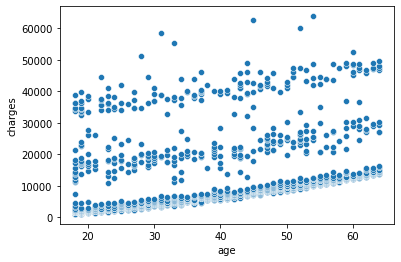

In [3]:
sns.scatterplot(data=df, x='age', y='charges')

What the above graph illustrates is that, while all ages have cases of high medical costs, there is a linear trend with medical costs rising as one ages. This makes sense intuitively because, as people get older, they become more susceptible certain medical conditions.

Let's break this down into a bar chart to get a better view of the costs as a general average.

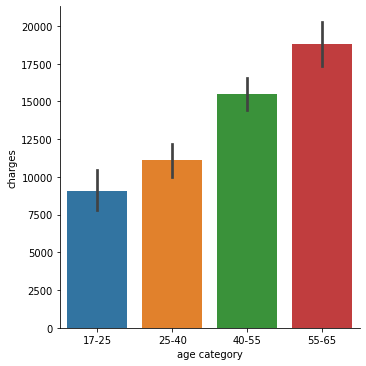

In [4]:
sns.catplot(x='age category', y='charges', kind='bar', data=df)

And what do you know! The linear trend can be seen again with as one ages, so does their medical cost.

Let's go back to the scatter plot, but this time let's differentiate which data points are smokers and which are non smokers.

<AxesSubplot:xlabel='age', ylabel='charges'>

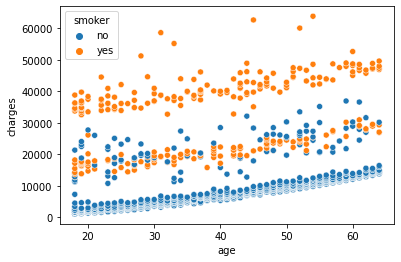

In [5]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

Yikes! Smoking is not good for you at all! 

Something interesting is that it looks like smokers account for nearly every data point with a high medical cost. Let's return to look deeper into this later, specifically Research Question 5.

### Research Question 2: Does having children increase one's medical costs?

Let's start by getting distributions side by side so we can see if there are any rises in costs that correlate from having children.

<AxesSubplot:xlabel='sex', ylabel='charges'>

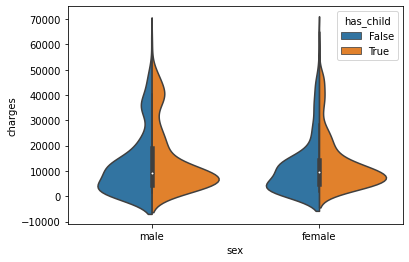

In [6]:
df.loc[df['children'] > 0, 'has_child'] = True
df.loc[df['children'] == 0, 'has_child'] = False

sns.violinplot(data=df, y='charges', x='sex', hue='has_child', split=True)

Hmm, it seems like having children doesn't seem to play a significant role in one's medical cost. The distribution seems to be ever so slightly shifted towards lower cost, but it is hard to say with confidence that this is due to whether they have had children or not. 

Let's look at a bar plot to see if we notice anything else.

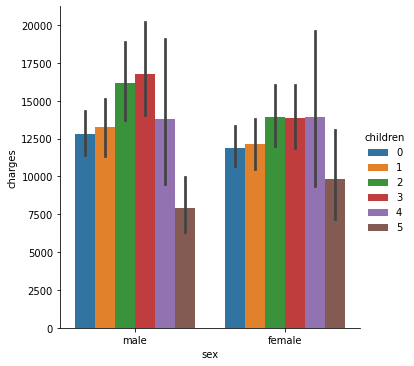

In [7]:
sns.catplot(data=df, x='sex', y='charges', hue='children', kind='bar')

O interesting! From the looks of it, men seem to have a $3,000 increase in their health costs when they have 3 or 4 chilren. The data on 5 children seems to be weirdly low, let's look at how the ages are distributed among people with children to get a better understanding of what may be going on.

<AxesSubplot:xlabel='children', ylabel='count'>

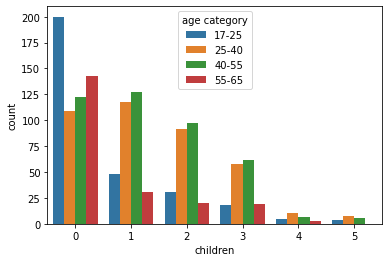

In [17]:
sns.countplot(data=df, x='children', hue='age category')

That is what I thought, this graph shows that there are very few young people with children which would lead to an older population. And, as illustrated in our first research question, medical costs grow linearly as one ages.

Another thing our count plot shows is that there is a pretty small sample size for parents with 4 or 5 children which likely resulted in the unusually low average charges displayed in the barplot above.

### Research Question 3: Do men with High BMI's face higher medical costs than women with High BMI's?

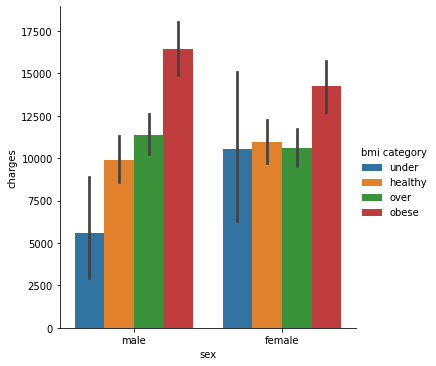

In [8]:
sns.catplot(data=df, x='sex', y='charges', hue='bmi category', kind='bar')

### Research Question 4: Do medical costs vary with region and sex?

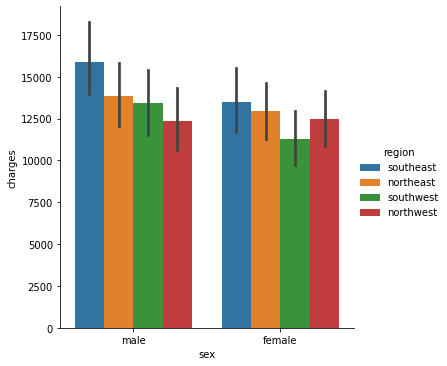

In [9]:
sns.catplot(data=df, x='sex', y='charges', hue='region', kind='bar')

### Research Question 5: How does being a smoker effect your medical costs?

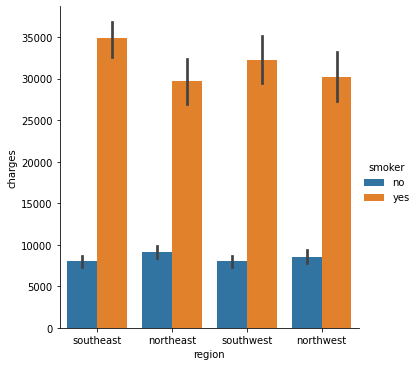

In [10]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df)

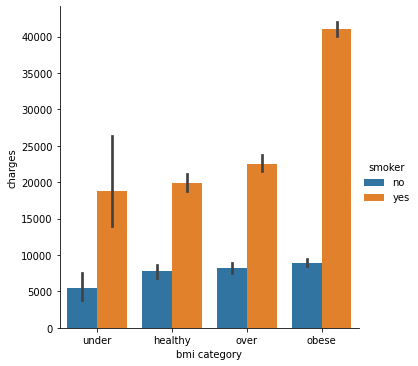

In [11]:
sns.catplot(x='bmi category', y='charges', hue='smoker', kind='bar', data=df)

<AxesSubplot:xlabel='cost category', ylabel='count'>

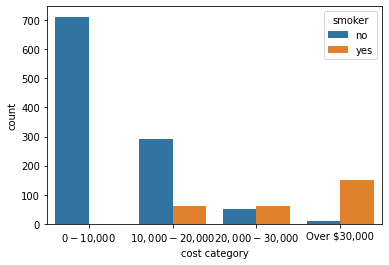

In [12]:
sns.countplot(data=df, x='cost category', hue='smoker')